# Exploratory Data Analysis and Visualisation Setup Starling Technical Assessment 

### Project Overview
This notebook facilitates the initial stages of exploratory data analysis (EDA) and visualisation for a dataset containing information about horse racing.Main objectives are to:

1. Load and inspect the dataset to understand its structure and identify any data quality issues.
2. Set up an environment for further analysis by importing necessary Python libraries.
3. Provide a clear overview of the data using summary statistics and initial exploration.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set Seaborn style for better visualization
sns.set(style="whitegrid")

In [4]:
# Load the dataset
data = pd.read_csv(r'C:\Users\frank\OneDrive\Documents\M\DataAnalyst_TechTest\Horses.csv')

# To get an overview of the data
data

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,...,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0,132,1398052.0,NaN,NaN,1198534,1289143.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0,132,1165412.0,NaN,NaN,1188128,1140080.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0,132,1239852.0,NaN,NaN,1199122,1448576.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0,132,1417524.0,NaN,NaN,1049637,1487690.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0,132,1354773.0,NaN,NaN,1140041,1403676.0,...,Good,Cloudy,1312,Flat,Turf,NaN,2YO only,380,02/05/2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36814,1028128,2980319,8,5.0,132,1165412.0,NaN,NaN,1079200,1492946.0,...,Standard,Cloudy,1969,Flat,Polytrack,NaN,3YO plus,325,07/02/2018,0
36815,1028128,2985033,6,3.0,132,1079281.0,NaN,NaN,1403297,1494400.0,...,Standard,Cloudy,1969,Flat,Polytrack,NaN,3YO plus,325,07/02/2018,0
36816,1028128,2977403,7,1.0,132,1440495.0,NaN,NaN,1079200,1482459.0,...,Standard,Cloudy,1969,Flat,Polytrack,NaN,3YO plus,325,07/02/2018,0
36817,1028128,2978297,4,4.0,132,1288634.0,NaN,NaN,1079234,1492370.0,...,Standard,Cloudy,1969,Flat,Polytrack,NaN,3YO plus,325,07/02/2018,0


# Are there any missing values in the dataset? 

In [5]:
# 1. Check for Missing Values
missing_values = data.isnull().sum()  # Count missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100  # Calculate percentage of missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage': missing_percentage
})

# 2. Display Missing Values Table
print("\nMissing Values in Columns:")
# Sort by percentage and display columns with missing values
display(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

# 3. Handle Missing Values
# Handle 'Age' and 'Colour' columns by filling missing values
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill 'Age' with median value
data['Colour'] = data['Colour'].fillna(data['Colour'].mode()[0])  # Fill 'Colour' with mode value

# 5. Check and Convert Data Types
print("\nData Types Before Conversion:")
display(data.dtypes)

# 6. Handle Data Type Conversions
# Convert 'ScheduledTime' - Coerce errors into NaT (missing values)
data['ScheduledTime'] = pd.to_datetime(data['ScheduledTime'], errors='coerce')

# Check if there are any missing 'ScheduledTime' after conversion
missing_scheduledtime = data['ScheduledTime'].isnull().sum()
print(f"\nMissing 'ScheduledTime' Entries: {missing_scheduledtime}")

# 7. Convert 'RaceType' column to category type (more memory efficient)
data['RaceType'] = data['RaceType'].astype('category')



Missing Values in Columns:


,Missing Values,Percentage
TongueStrap,36819,100.000000
Eyecover,36819,100.000000
EyeShield,36819,100.000000
CheekPieces,36819,100.000000
Hood,36819,100.000000
Visor,36751,99.815313
OverweightValue,36713,99.712105
AllowanceValue,35210,95.629974
YearBorn,31659,85.985497
StatDistance,29691,80.640430



Data Types Before Conversion:


RaceID                  int64
HorseID                 int64
Cloth                   int64
Stall                 float64
WeightValue             int64
JockeyID              float64
AllowanceValue        float64
OverweightValue       float64
TrainerID               int64
OwnerID               float64
LastRunDaysFlat       float64
Age                   float64
Blinkers              float64
Hood                  float64
Visor                 float64
EyeShield             float64
Eyecover              float64
TongueStrap           float64
CheekPieces           float64
ForecastPrice          object
StatCourse            float64
StatDistance          float64
StatCourseDistance    float64
StartingPrice          object
Bred                   object
DamID                 float64
SireID                float64
DamSireID             float64
Sex                    object
Colour                 object
YearBorn              float64
MeetingID               int64
RaceNumber              int64
ScheduledT


Missing 'ScheduledTime' Entries: 36819


1. **Missing Values Analysis**:
   - The first section displays a breakdown of missing values and their percentages for each column in the dataset.
   - Certain columns, such as `Trainer` and `SysTrainer`, have a relatively high percentage of missing values, indicating potential data quality issues for these fields.
   - Columns with no missing values or very low percentages (e.g., `HorseID`, `Sex`) suggest they are more complete and reliable.

2. **Data Types Before Conversion**:
   - The second section provides the data types of each column before conversion.
   - This highlights potential issues, such as columns being stored as inappropriate data types (e.g., dates stored as strings or categories stored as objects).
   - The presence of mixed data types (e.g., `ScheduledTime` as an object before conversion) indicates that some cleaning and transformation steps are required.

3. **Dataset Overview**:
   - The dataset contains 14,983 features (columns) and a large number of observations.
   - The presence of diverse features (e.g., categorical, numerical, and date-related) suggests the data is multidimensional, requiring specific handling and analysis techniques for different variable types.

**Implications**:
- Columns with high missing percentages may need to be dropped or imputed, depending on their importance to the analysis.
- Proper type conversion ensures accurate computations and modelling (e.g., converting `ScheduledTime` to a datetime format).
- The dataset seems well-suited for exploratory data analysis, but specific attention should be given to addressing missing values and ensuring correct data types.

# Initial Analysis & Overview of Data
## 1. Analysis of Horse Age Distribution by Year

This initial analysis explores how the age composition of horses participating in races changes over time. By grouping data by HorseID and Year, it identifies the first recorded age for each horse annually and calculates the distribution of horses at each age per year. 

The visualisation highlights trends in age groups, race participation patterns, and shifts in the racing population's age structure. This provides insights into breeding, training, and participation trends across years, supporting decisions in race planning and horse management.


In [6]:
# Set Seaborn style for better visualization
sns.set(style="whitegrid")

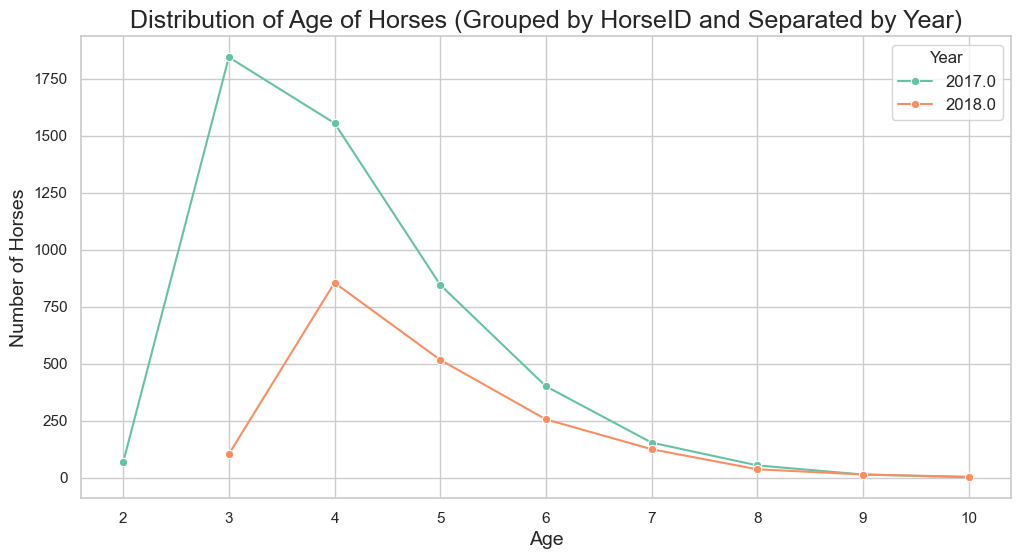

In [7]:
data['MeetingDate'] = pd.to_datetime(data['MeetingDate'], errors='coerce')
data['Year'] = data['MeetingDate'].dt.year

# Group by HorseID and Year, then take the first recorded age for each horse within each year
unique_horses_by_year = data.groupby(['HorseID', 'Year']).first().reset_index()

# Calculate the age distribution by year
age_distribution_by_year = unique_horses_by_year.groupby(['Year', 'Age']).size().reset_index(name='HorseCount')

# Plot a line graph for the distribution of horse ages, separated by year
plt.figure(figsize=(12, 6))  # Increased figure size for clarity

sns.lineplot(data=age_distribution_by_year, x='Age', y='HorseCount', hue='Year', marker='o', palette='Set2')
plt.title('Distribution of Age of Horses (Grouped by HorseID and Separated by Year)', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Horses', fontsize=14)
plt.legend(title='Year', fontsize=12)
plt.show()


## 1. Analysis of Horse Distribution by Sex

This initial exploration investigates the distribution of horses by sex in the dataset. By grouping data by **HorseID**, the first recorded value for each horse's **Sex** ensures no duplicates, allowing for an accurate count.

The analysis reveals the proportion of male and female horses in the population through a pie chart, providing insights into gender composition and potential implications for breeding, training, or performance trends. However, the reliability of the data is limited, as it required cleaning to handle missing values and unusual inputs, such as invalid entries like 'C'.


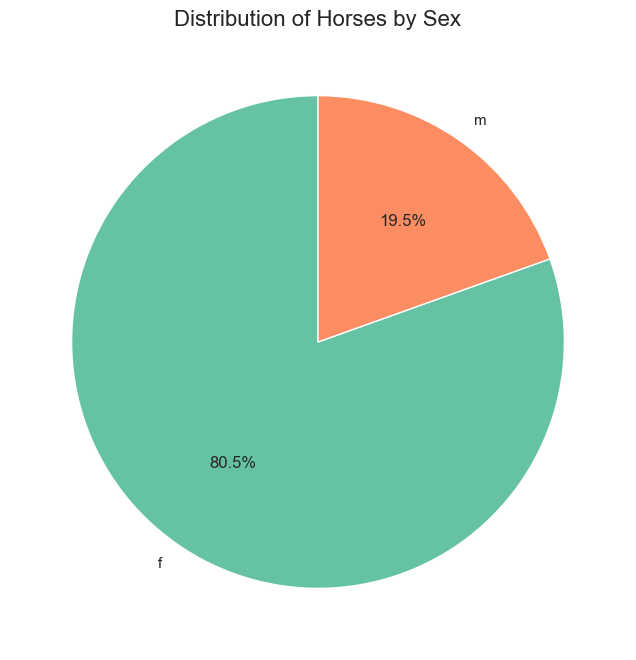

In [9]:
# Filter data to include only rows where 'Sex' is 'F' or 'M'
data6 = data[data['Sex'].isin(['f', 'm'])]

# Group by HorseID to count unique horses by Sex
unique_horses_sex = data6.groupby('HorseID')['Sex'].first().value_counts()

# Plot pie chart 
plt.figure(figsize=(8, 8))
plt.pie(unique_horses_sex, labels=unique_horses_sex.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Set2', n_colors=len(unique_horses_sex)), startangle=90)
plt.title('Distribution of Horses by Sex', fontsize=16)
plt.show()


## 3.Analysis of Race Distribution by Year and Month

The analysis aims to examine the distribution of races across different months and years by first extracting the **Year-Month** from the `MeetingDate` column in the dataset. This is achieved by converting the `MeetingDate` to a datetime format and then extracting the year and month as a period. Once the data is grouped by **Year-Month**, the number of races for each period is counted. To visualize this distribution, a count plot is generated, with the **x-axis** representing the **Year-Month** and the **y-axis** displaying the number of races held in each corresponding period. This approach provides a clear view of race trends over time, highlighting any fluctuations or patterns that may emerge across months and years.


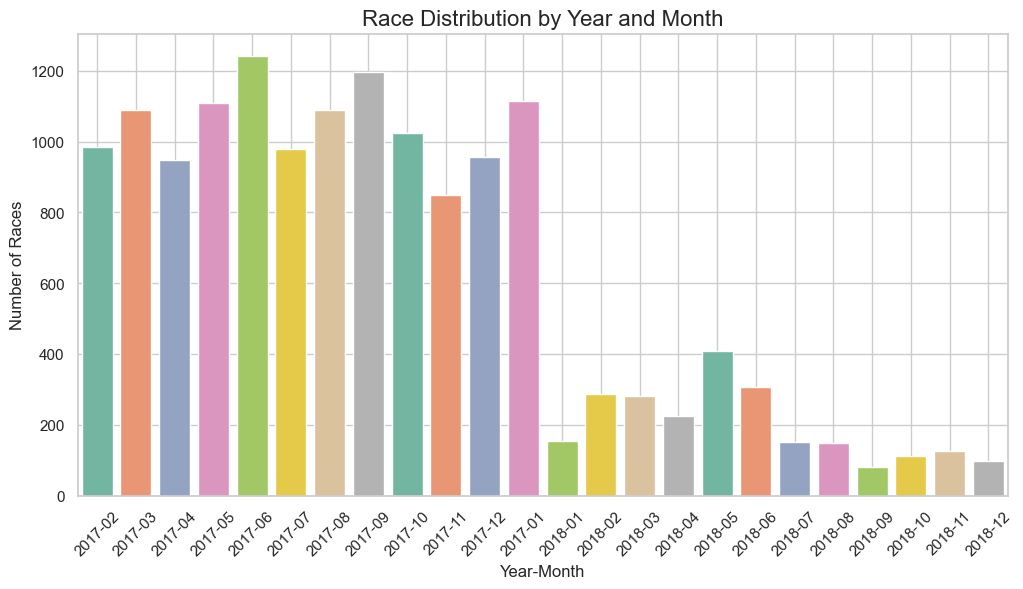

In [16]:
#'MeetingDate' is in datetime format
data['MeetingDate'] = pd.to_datetime(data['MeetingDate'], errors='coerce')

# Extract year and month from 'MeetingDate'
data['Year-Month'] = data['MeetingDate'].dt.to_period('M')

# Create a count plot for the distribution of races by Year-Month
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year-Month', hue='Year-Month', palette='Set2', legend=False)
plt.title('Race Distribution by Year and Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Races', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


## 4. Winning Probabilities by Age Analysis

An initial exploration of the data could provide insights into how a horse's age affects its winning probability, highlighting age groups with higher success rates. It could reveal trends such as whether younger or older horses perform better, identify outliers, and show the distribution of horses across age groups. This analysis may also offer valuable insights into optimal training and breeding strategies, as well as highlight consistent performers over time.

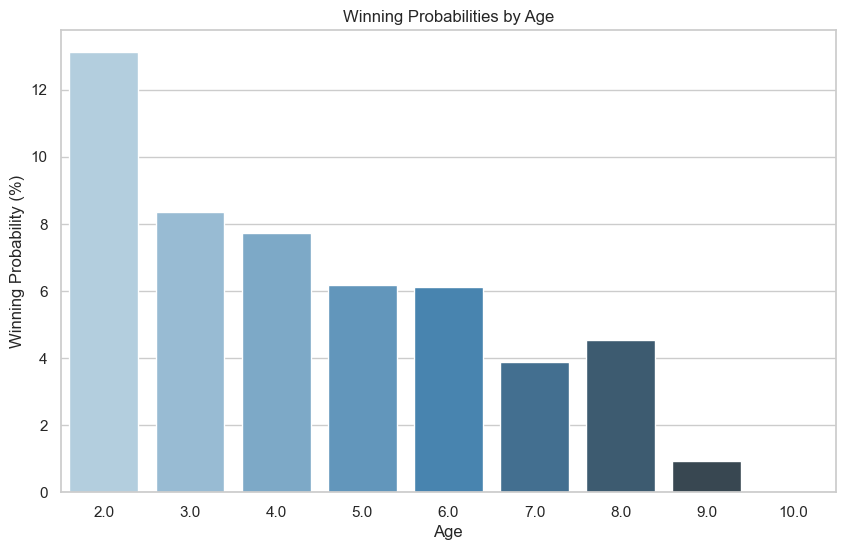

In [32]:
# Group by HorseID to ensure each horse is counted only once
age_win_probs = data.groupby('HorseID').agg({'Age': 'first', 'Won': 'mean'})  # Take the first 'Age' for each 'HorseID' and compute the mean 'Won'

# Group by 'Age' and calculate the mean 'Won' for each age group
age_win_probs_grouped = age_win_probs.groupby('Age')['Won'].mean()

# Convert the winning probabilities to percentages
age_win_probs_grouped = age_win_probs_grouped * 100

# Plot the barplot for winning probabilities by age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_win_probs_grouped.index, y=age_win_probs_grouped.values, palette='Blues_d', hue=age_win_probs_grouped.index, legend=False)
plt.title("Winning Probabilities by Age")
plt.xlabel("Age")
plt.ylabel("Winning Probability (%)")
plt.show()

## 4. Heatmap of Winning Probabilities by Age and Going

An initial exploration of this analysis could provide insights into how track conditions (**Going**) influence a horse's winning probability across different age groups. It could reveal whether younger or older horses perform better under certain conditions. By visualizing the heatmap, trends in track performance for each age group can be easily identified, showing if particular age groups excel under specific conditions or if there's any noticeable pattern linking age with track suitability. Additionally, this could uncover any hidden patterns, such as older horses outperforming younger ones in specific going conditions or vice versa, offering valuable insights into race strategies and training.

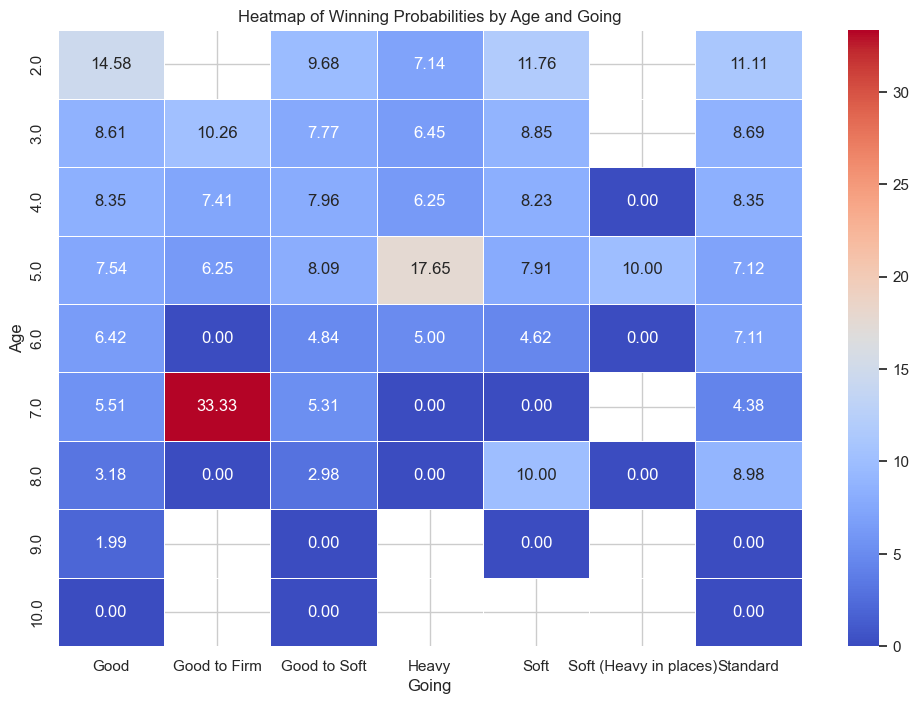

In [37]:
age_going_win_probs = data.groupby(['HorseID', 'Age', 'Going']).agg({'Won': 'mean'}).reset_index()

age_going_win_probs['Won'] = age_going_win_probs['Won'] * 100  # Convert to percentage

# Pivot the data so that we have 'Age' as rows, 'Going' as columns, and the mean 'Won' as values
heatmap_data = age_going_win_probs.pivot_table(index='Age', columns='Going', values='Won', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Winning Probabilities by Age and Going')
plt.xlabel('Going')
plt.ylabel('Age')
plt.show()
